In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
glass=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glass.shape

(214, 10)

In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
X=glass.iloc[:,:9]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
Y=glass.iloc[:,-1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [ ]:
print(X.shape,Y.shape)

(214, 9) (214,)


In [ ]:
kf=KFold(n_splits=5)
kn=KNeighborsClassifier(n_neighbors=14)
score=cross_val_score(kn,X,Y,cv=kf)
print(score*100)

[11.62790698 76.74418605 32.55813953 23.25581395  0.        ]


In [ ]:
n_neighbors=np.array(range(1,20))
param_grid=dict(n_neighbors=n_neighbors)
kn2=KNeighborsClassifier()
gs=GridSearchCV(estimator=kn2,param_grid=param_grid)
gs.fit(X,Y)
y_pred=gs.predict(X)
print(classification_report(Y,y_pred))
print(gs.best_score_*100,gs.best_params_,gs.best_estimator_)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00        29

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214

64.0531561461794 {'n_neighbors': 1} KNeighborsClassifier(n_neighbors=1)


In [ ]:
k_range=range(1,10)
k_score=[]
for k in k_range:
  kn3=KNeighborsClassifier(n_neighbors=k)
  score2=cross_val_score(kn3,X,Y,cv=kf,scoring="accuracy")
  k_score.append(score2.mean())

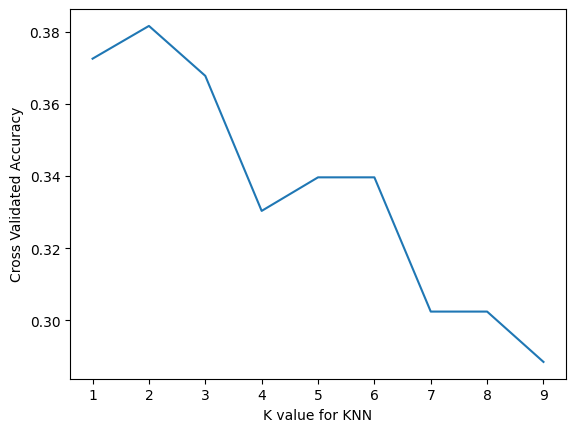

In [ ]:
plt.plot(k_range,k_score)
plt.xlabel("K value for KNN")
plt.ylabel("Cross Validated Accuracy")
plt.show()

Text(0, 0.5, 'K Value')

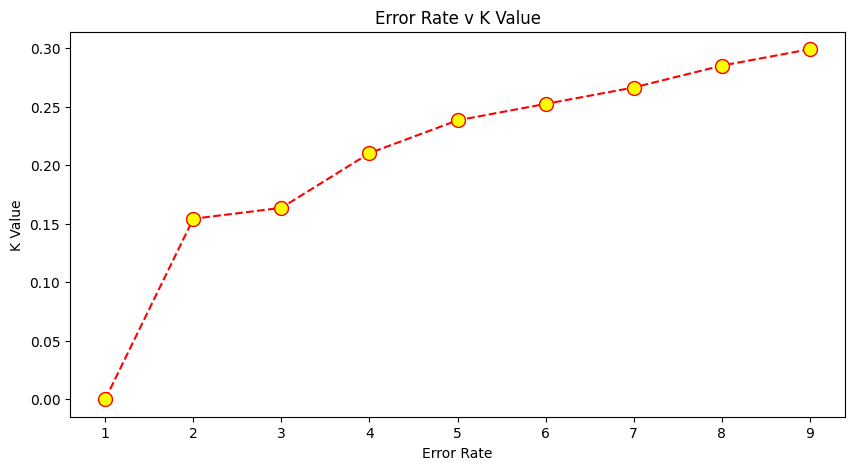

In [ ]:
#Error Rate v K value
plt.figure(figsize=(10,5))
error_rate=[]
for i in range(1,10):
  kn4=KNeighborsClassifier(n_neighbors=i)
  kn4.fit(X,Y)
  i_pred=kn4.predict(X)
  error_rate.append(np.mean(i_pred!=Y))

plt.plot(range(1,10),error_rate,color="red",linestyle="dashed",marker="o",markerfacecolor="yellow",markersize=10)
plt.title("Error Rate v K Value")
plt.xlabel("Error Rate")
plt.ylabel("K Value")